In [25]:
#author : @akash

In [5]:
from textblob import TextBlob
#import sys, tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk

In [6]:
#for download dataset run once only

"""
import requests

url ="https://www.kaggle.com/api/v1/datasets/download/noorsaeed/indian-election-sentiment-dataset-tweets"
response = requests.get(url)

with open("indian-election-sentiment-analysis-dataset.zip", "wb") as file:
    file.write(response.content)

print("Download completed!")

#https://www.kaggle.com/api/v1/datasets/download/noorsaeed/indian-election-sentiment-dataset-tweets
"""

'\nimport requests\n\nurl ="https://www.kaggle.com/api/v1/datasets/download/noorsaeed/indian-election-sentiment-dataset-tweets"\nresponse = requests.get(url)\n\nwith open("indian-election-sentiment-analysis-dataset.zip", "wb") as file:\n    file.write(response.content)\n\nprint("Download completed!")\n\n#https://www.kaggle.com/api/v1/datasets/download/noorsaeed/indian-election-sentiment-dataset-tweets\n'

In [7]:
#how to unzip  a zip file
"""
import zipfile

with zipfile.ZipFile("indian-election-sentiment-analysis-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("indian-election-sentiment-analysis-dataset")

"""

'\nimport zipfile\n\nwith zipfile.ZipFile("indian-election-sentiment-analysis-dataset.zip", "r") as zip_ref:\n    zip_ref.extractall("indian-election-sentiment-analysis-dataset")\n\n'

In [14]:
modi=pd.read_csv("modi_reviews.csv")
rahul=pd.read_csv("rahul_reviews.csv")


In [15]:
modi.shape,rahul.shape

((25688, 3), (14261, 3))

In [17]:
def sentiment_of_review(review):
    review = str(review)
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [18]:
modi['sentiment']=modi['Tweet'].apply(sentiment_of_review)
rahul['sentiment']=rahul['Tweet'].apply(sentiment_of_review)

In [19]:
#now i want to remove rows where sentiment is Neutral
modi=modi[modi['sentiment']!='Neutral']
rahul=rahul[rahul['sentiment']!='Neutral']

In [20]:
modi.shape,rahul.shape

((17481, 4), (9367, 4))

In [21]:
#now i want to do balance modi and rahul data

#need to remove random 8481 rows from modi data and 367 from rahul data to make both data size 9000 rows

# Get the current lengths of the DataFrames after filtering
modi_len = len(modi)
rahul_len = len(rahul)

# Generate random indices within the valid range for each DataFrame
modi_indices_to_drop = np.random.choice(modi_len, min(8481, modi_len), replace=False) # Ensure you don't try to drop more rows than exist
rahul_indices_to_drop = np.random.choice(rahul_len, min(367, rahul_len), replace=False) # Ensure you don't try to drop more rows than exist


modi = modi.drop(modi.index[modi_indices_to_drop]) # Use .index to drop rows by their actual index values
rahul = rahul.drop(rahul.index[rahul_indices_to_drop]) # Use .index to drop rows by their actual index values

In [22]:
modi.shape,rahul.shape


((9000, 4), (9000, 4))

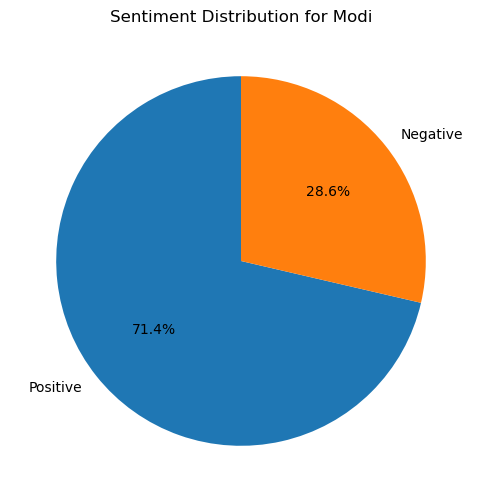

In [23]:
# @title Sentiment Distribution for Modi

import matplotlib.pyplot as plt

# Assuming 'modi' is your DataFrame
sentiment_counts = modi['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Sentiment Distribution for Modi')


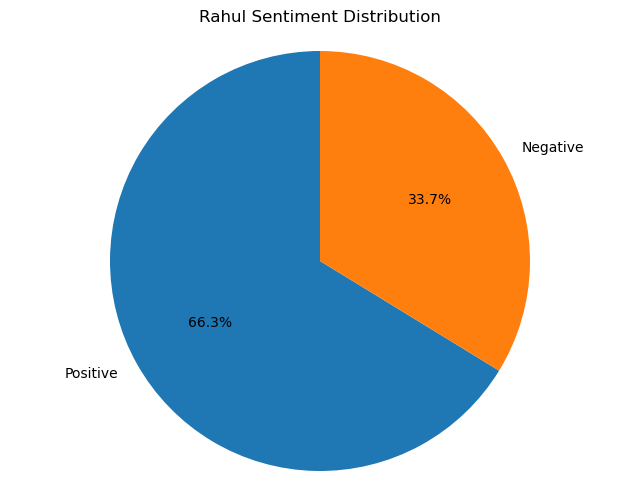

In [24]:
# prompt: Using dataframe rahul: pie plot

import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = rahul['sentiment'].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rahul Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
